# Library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lime.lime_tabular import LimeTabularExplainer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import Data

Data URL: https://www.kaggle.com/competitions/predict-who-is-more-influential-in-a-social-network/data

- Each observation describes two individuals, A and B. 
- There are 11 variables for each person based on Twitter activity, e.g., number of followers, retweets, network characteristics, etc. 
- Each observation shows whether A > B (Choice = “1”) or B > A (Choice = “0”).

In [3]:
train = pd.read_csv('train.csv')

In [4]:
pd.set_option('display.max_columns', None)
train.head(5)

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [6]:
train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,84.805209,3747.219758,6.854869e+05,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,104.073204,5757.339852,2.160612e+06,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,14.991870,1180.805341,2.498250e+03,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,54.925234,2206.420734,4.402700e+04,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,109.695652,4390.379310,3.701142e+05,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1121.000000,144651.461538,3.654319e+07,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


# Preprocessing

In [7]:
AMinusB = pd.DataFrame()
AMinusB['Choice'] = train['Choice']
AMinusB['follower_count'] = train['A_follower_count'] - train['B_follower_count']
AMinusB['following_count'] = train['A_following_count'] - train['B_following_count']
AMinusB['listed_count'] = train['A_listed_count'] - train['B_listed_count']
AMinusB['mentions_received'] = train['A_mentions_received'] - train['B_mentions_received']
AMinusB['retweets_received'] = train['A_retweets_received'] - train['B_retweets_received']
AMinusB['mentions_sent'] = train['A_mentions_sent'] - train['B_mentions_sent']
AMinusB['retweets_sent'] = train['A_retweets_sent'] - train['B_retweets_sent']
AMinusB['posts'] = train['A_posts'] - train['B_posts']
AMinusB['network_feature_1'] = train['A_network_feature_1'] - train['B_network_feature_1']
AMinusB['network_feature_2'] = train['A_network_feature_2'] - train['B_network_feature_2']
AMinusB['network_feature_3'] = train['A_network_feature_3'] - train['B_network_feature_3']

In [8]:
AMinusB.head(5)

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


In [9]:
AMinusB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Choice             5500 non-null   int64  
 1   follower_count     5500 non-null   int64  
 2   following_count    5500 non-null   int64  
 3   listed_count       5500 non-null   int64  
 4   mentions_received  5500 non-null   float64
 5   retweets_received  5500 non-null   float64
 6   mentions_sent      5500 non-null   float64
 7   retweets_sent      5500 non-null   float64
 8   posts              5500 non-null   float64
 9   network_feature_1  5500 non-null   int64  
 10  network_feature_2  5500 non-null   float64
 11  network_feature_3  5500 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 515.8 KB


In [10]:
AMinusB.describe()

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,-3.560291e+04,-7.931036e+01,49.304909,1.114342e+02,35.221885,-0.087785,0.003688,-0.415091,12.834364,-0.218986,2.044277
std,0.499956,2.724394e+06,7.043435e+04,21248.786134,3.826375e+04,14335.255250,13.497549,2.706191,26.374714,38911.503783,147.537349,8004.969474
min,0.000000,-3.619107e+07,-6.643230e+05,-544716.000000,-1.144742e+06,-435624.675035,-76.709011,-16.190036,-192.971915,-918957.000000,-1816.719697,-74409.992424
25%,0.000000,-1.838008e+05,-1.384750e+03,-3477.250000,-1.827743e+02,-62.624442,-4.320936,-0.729064,-5.491086,-671.000000,-59.634217,-2151.743979
50%,1.000000,1.500000e+01,1.600000e+01,6.000000,-1.458770e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-75.796970
75%,1.000000,1.779708e+05,1.501000e+03,3638.500000,1.814826e+02,64.416753,4.286998,0.736936,5.202471,676.000000,61.516295,2129.051229
max,1.000000,3.506800e+07,1.162212e+06,518386.000000,1.143815e+06,435394.770296,76.709011,15.933596,192.971915,915090.000000,1078.000000,142621.361538


In [11]:
AMinusB.isna().sum()

Choice               0
follower_count       0
following_count      0
listed_count         0
mentions_received    0
retweets_received    0
mentions_sent        0
retweets_sent        0
posts                0
network_feature_1    0
network_feature_2    0
network_feature_3    0
dtype: int64

## Correlation Matrix

In [12]:
AMinusB_X = AMinusB.drop(columns=['Choice'])

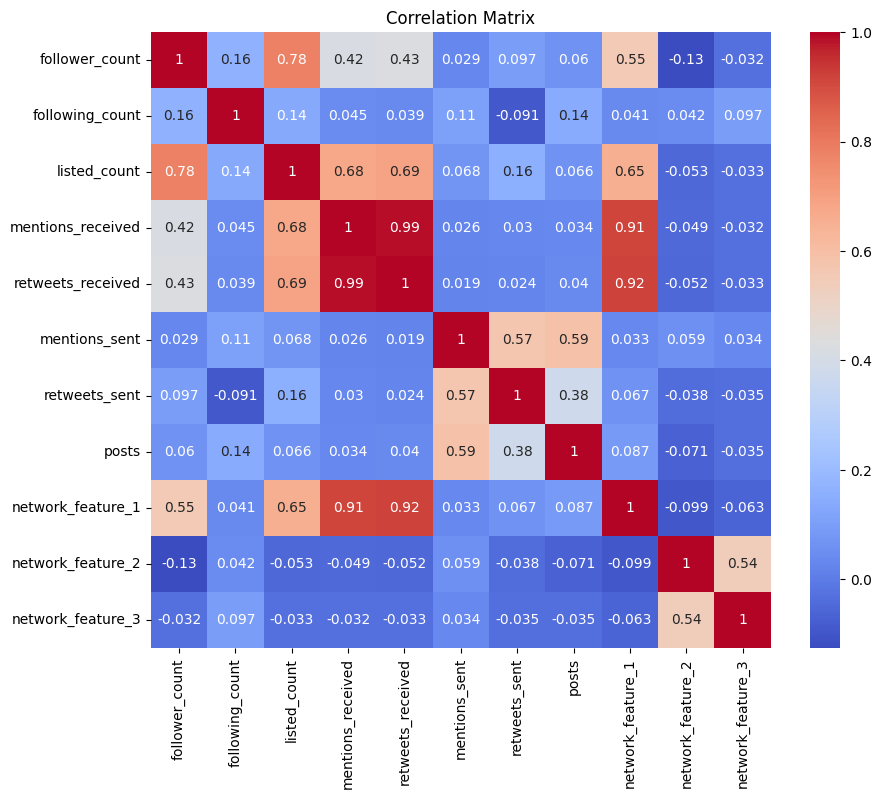

In [13]:
correlation_matrix = AMinusB_X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
vif_data = pd.DataFrame()
vif_data["feature"] = AMinusB_X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(AMinusB_X.values, i) for i in range(AMinusB_X.shape[1])]

print(vif_data)

              feature        VIF
0      follower_count   4.663086
1     following_count   1.119109
2        listed_count   5.985900
3   mentions_received  44.226732
4   retweets_received  53.989339
5       mentions_sent   2.047118
6       retweets_sent   1.670279
7               posts   1.622130
8   network_feature_1  11.265272
9   network_feature_2   1.471841
10  network_feature_3   1.432498


### Drop & Alter Columns

In [15]:
NewData = AMinusB.copy()
NewData['engagement_received'] = (NewData['mentions_received'] + NewData['retweets_received']) / 2

NewData = NewData.drop(['mentions_received', 'retweets_received', 'network_feature_1'], axis=1)


In [16]:
NewData_X = NewData.drop(columns=['Choice'])
vif_data = pd.DataFrame()
vif_data["feature"] = NewData_X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(NewData_X.values, i) for i in range(NewData_X.shape[1])]

print(vif_data)

               feature       VIF
0       follower_count  2.840242
1      following_count  1.111957
2         listed_count  4.438912
3        mentions_sent  2.029493
4        retweets_sent  1.625647
5                posts  1.585753
6    network_feature_2  1.471017
7    network_feature_3  1.424352
8  engagement_received  2.052317


## Random Forest Model

In [17]:
X = NewData.drop('Choice', axis=1)
y = NewData['Choice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

feature_importances = random_forest.feature_importances_

### Result

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7527272727272727
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       530
           1       0.77      0.74      0.76       570

    accuracy                           0.75      1100
   macro avg       0.75      0.75      0.75      1100
weighted avg       0.75      0.75      0.75      1100



### Confusion Matrix

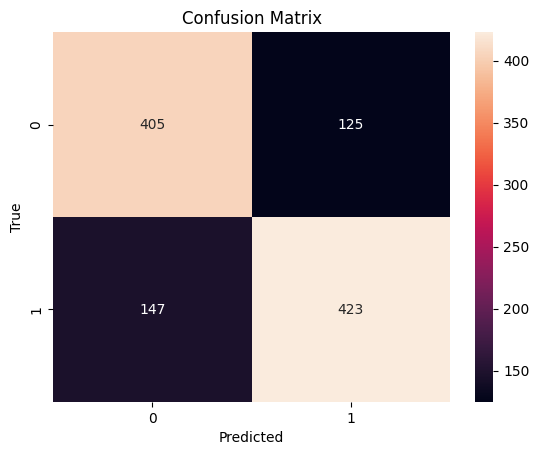

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Feature Importance

follower_count: 0.15408577094322734
following_count: 0.07719104281986139
listed_count: 0.23572871136586457
mentions_sent: 0.07904485991961627
retweets_sent: 0.07147509656867915
posts: 0.08751154951150525
network_feature_2: 0.07776427930192609
network_feature_3: 0.07484346529964682
engagement_received: 0.14235522426967323


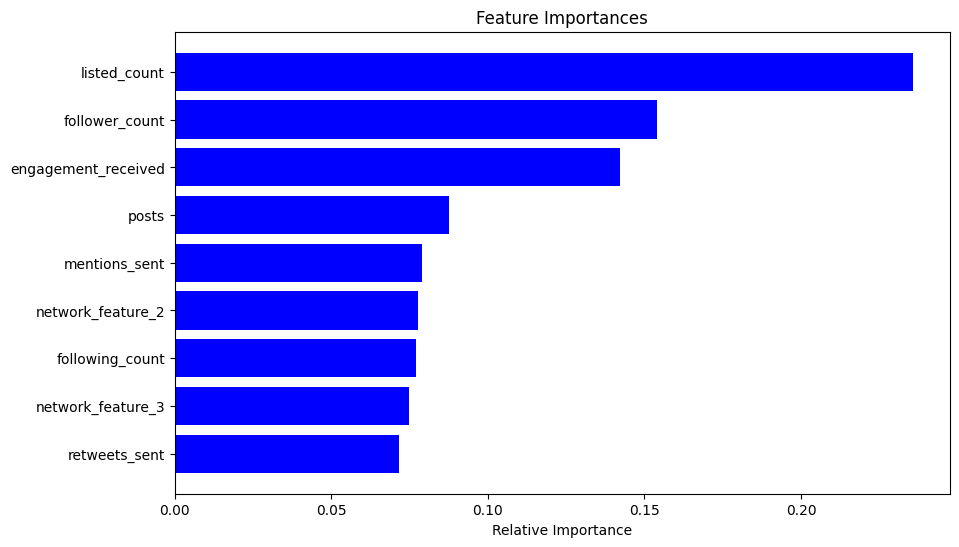

In [19]:
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

features = X.columns
indices = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))

## KNN

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7390909090909091
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       530
           1       0.75      0.74      0.75       570

    accuracy                           0.74      1100
   macro avg       0.74      0.74      0.74      1100
weighted avg       0.74      0.74      0.74      1100



## Logistic Regression

In [19]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7190909090909091
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       530
           1       0.74      0.71      0.72       570

    accuracy                           0.72      1100
   macro avg       0.72      0.72      0.72      1100
weighted avg       0.72      0.72      0.72      1100



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Network Model

In [44]:
X = NewData.drop('Choice', axis=1)
y = NewData['Choice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_features = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)

y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6146 - loss: 10701.3457 - val_accuracy: 0.5336 - val_loss: 421.0260
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6570 - loss: 1717.3876 - val_accuracy: 0.6382 - val_loss: 3368.1814
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.6721 - loss: 2497.6648 - val_accuracy: 0.4882 - val_loss: 1183.0201
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.6531 - loss: 3662.2332 - val_accuracy: 0.7445 - val_loss: 4657.4341
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.7005 - loss: 2076.5071 - val_accuracy: 0.6382 - val_loss: 994.9434
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.6809 - loss: 3401.9233 - val_accuracy: 0.6100 - val_loss: 4337.2476
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.6921 - loss: 2151.0984 - val_accuracy: 0.7245 - val_loss: 668.1257
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accurac

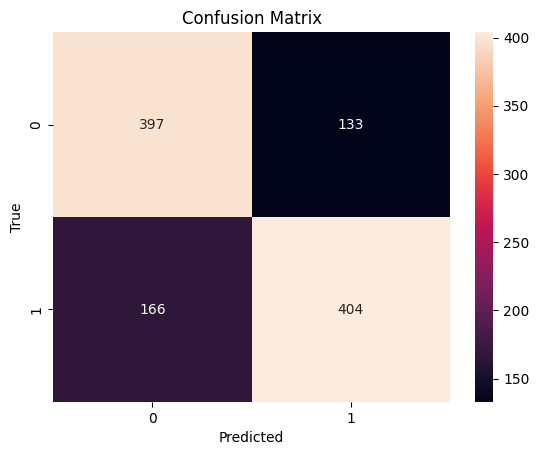

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
# Initialize LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode='classification')

# Select a specific instance for which you want to explain the prediction
instance_index = 0  # Choose any instance index from the test set
instance = X_test.iloc[instance_index]

# Explain the prediction for the selected instance
# Define a function to predict probabilities instead of predict_proba
predict_fn = lambda x: model.predict(x)
explanation = explainer.explain_instance(instance.values, predict_fn, num_features=len(X_train.columns), labels=[0])

# Print the explanation
explanation.show_in_notebook()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


# Calculate the financial value

A retailer wants influencers to tweet its promotion for a product. If a non-influencer tweets, there is no benefit to the retailer. If an influencer tweets once, there is a 0.02\% chance that his/her followers will buy one unit of a product. Assume the retailer has a profit margin of $10 per unit, and that one customer can buy only one unit. If an influencer tweets twice, the overall buying probability will be 0.03\%. Without analytics, the retailer offers $5 to each person (A and B) to tweet once. With analytics, the retailer offers $10 to those identified as influencers by the model to send two tweets each. If the model classifies an individual as a non-influencer, s/he is not selected/paid by the retailer to tweet.

- **Without Analytics**: Every individual (A and B) is offered $5 to tweet once, regardless of influence.
- **With Analytics**: Identified influencers are offered $10 to send two tweets each.
- **Profit Per Unit**: $10.
- **Buying Probabilities**: 0.02% (0.0002) for one tweet, 0.03% (0.0003) for two tweets.
- **Data Assumptions**: Each record in the dataset represents a pair (A, B) where Choice indicates whether A (>B) or B (>A) is more influential.

In [58]:
profit_per_unit = 10  # Profit for each unit sold
cost_per_tweet_no_analytics = 5  # Cost without analytics per person for one tweet
cost_per_tweet_with_analytics = 10  # Cost with analytics per influencer for two tweets
probability_buy_one_tweet = 0.0002  # Probability of buying with one tweet
probability_buy_two_tweets = 0.0003  # Probability of buying with two tweets
model_accuracy = 0.7527272727272727  # Assumed model accuracy for identifying influencers

In [59]:
def calculate_net_profit(row):
    # Net profit without the model: both A and B tweet once
    profit_without_model = (row['A_follower_count'] + row['B_follower_count']) * \
        probability_buy_one_tweet * profit_per_unit - (cost_per_tweet_no_analytics * 2)

    # With the model: Determine the influencer (A or B), who then tweets twice
    if row['Choice'] == 1:  # If A is more influential
        influencer_followers = row['A_follower_count']
    else:  # If B is more influential
        influencer_followers = row['B_follower_count']
    
    # Calculating expected profit with the model, considering model accuracy
    expected_sales = influencer_followers * probability_buy_two_tweets
    profit_with_model = expected_sales * profit_per_unit * model_accuracy - cost_per_tweet_with_analytics

    return profit_without_model, profit_with_model


In [60]:
FinancialImpact = train.copy()
FinancialImpact [['Without_model', 'With_model']] = FinancialImpact.apply(
    lambda row: pd.Series(calculate_net_profit(row)), axis=1)


In [61]:
FinancialImpact.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3,Without_model,With_model
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939,59.382,67.823720
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337,111.706,78.660735
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333,11.864,-1.820865
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634,29.164,34.174553
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907,96.286,92.948251


In [63]:
Profit_with_model = FinancialImpact['With_model'].sum()
Profit_with_model

12086269.440919999

In [64]:
Profit_without_model = FinancialImpact['Without_model'].sum()
Profit_without_model

14634078.920000002

In [65]:
Profit_with_model - Profit_without_model

-2547809.4790800028